In [1]:
## Importing the dataset
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv(r"C:\Users\Admin\Downloads\intern\Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# VISUALIZATION

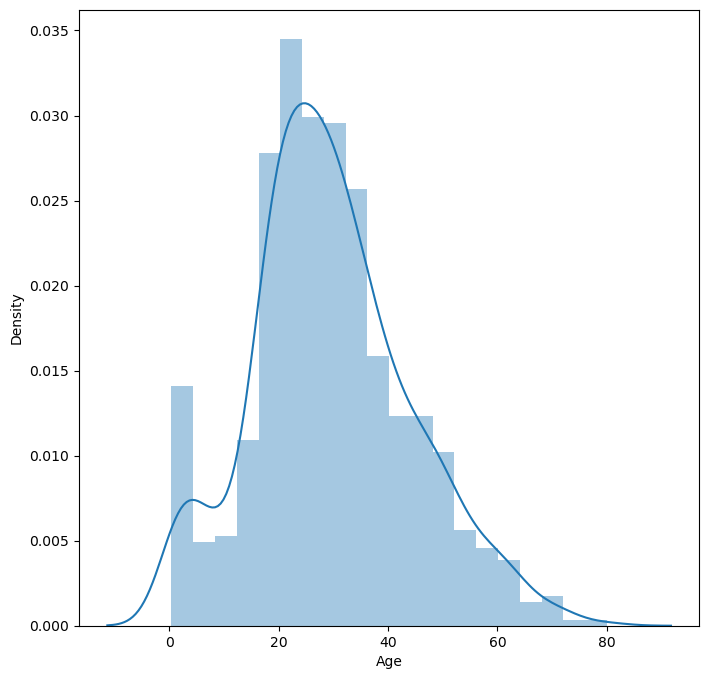

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.distplot(data['Age'])
plt.show()

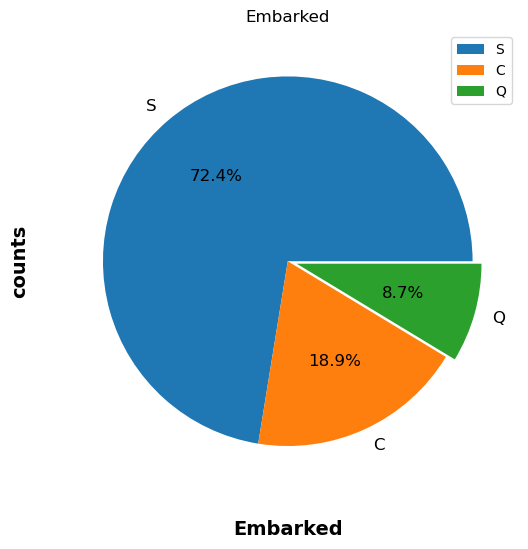

In [4]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
data["Embarked"].value_counts().plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Embarked')
plt.xlabel('Embarked', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = data["Embarked"].value_counts().index, loc = "best")
plt.show()


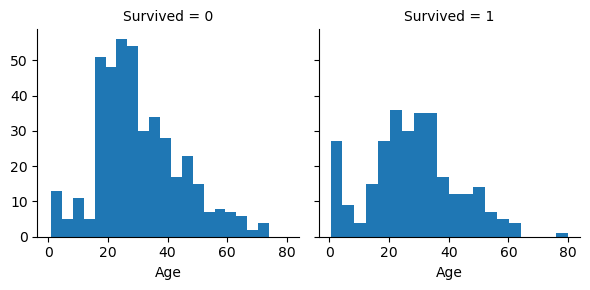

In [5]:
age=sns.FacetGrid(data,col='Survived')
age.map(plt.hist,'Age',bins=20)

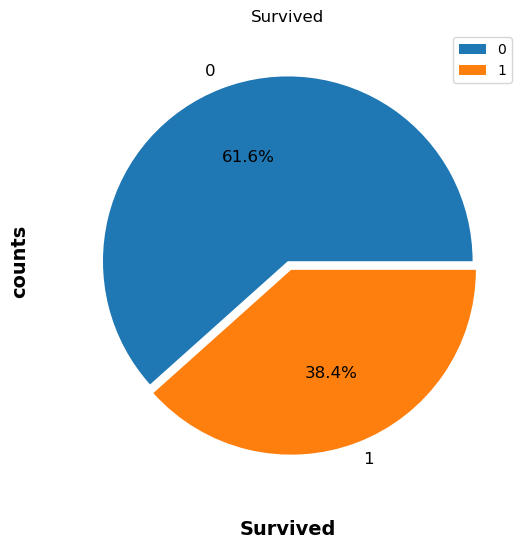

In [6]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
data["Survived"].value_counts().plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = data["Survived"].value_counts().index, loc = "best")
plt.show()

# EDA

In [7]:
data["Embarked"]=data["Embarked"].replace({"S":0,"C":1,"Q":2})
data["Sex"]=data["Embarked"].replace({"male":0,"female":1})

In [8]:
target = data["Survived"]
data.drop(columns=["Survived"],inplace=True)

In [9]:
data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              2
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.drop(columns=["Name","Cabin","Ticket"],inplace=True)
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0.0,22.0,1,0,7.2500,0.0
1,2,1,1.0,38.0,1,0,71.2833,1.0
2,3,3,0.0,26.0,0,0,7.9250,0.0
3,4,1,0.0,35.0,1,0,53.1000,0.0
4,5,3,0.0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,887,2,0.0,27.0,0,0,13.0000,0.0
887,888,1,0.0,19.0,0,0,30.0000,0.0
888,889,3,0.0,NaN,1,2,23.4500,0.0
889,890,1,1.0,26.0,0,0,30.0000,1.0


In [11]:
target.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
data.isna().sum()

PassengerId      0
Pclass           0
Sex              2
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [13]:
data["Age"].fillna(data["Age"].median(),inplace=True)
data.dropna(inplace=True)
data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
## Preprocessing the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.73250451,  0.82520863, -0.56968402, ..., -0.47432585,
        -0.50023975, -0.56968402],
       [-1.72861124, -1.57221121,  1.00313924, ..., -0.47432585,
         0.78894661,  1.00313924],
       [-1.72471797,  0.82520863, -0.56968402, ..., -0.47432585,
        -0.48664993, -0.56968402],
       ...,
       [ 1.72471797,  0.82520863, -0.56968402, ...,  2.00611934,
        -0.17408416, -0.56968402],
       [ 1.72861124, -1.57221121,  1.00313924, ..., -0.47432585,
        -0.0422126 ,  1.00313924],
       [ 1.73250451,  0.82520863,  2.5759625 , ..., -0.47432585,
        -0.49017322,  2.5759625 ]])

In [15]:
## Preparing the scaled dataframe
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
scaled_data["Survived"] = target
scaled_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,-1.732505,0.825209,-0.569684,-0.563674,0.431350,-0.474326,-0.500240,-0.569684,0
1,-1.728611,-1.572211,1.003139,0.669217,0.431350,-0.474326,0.788947,1.003139,1
2,-1.724718,0.825209,-0.569684,-0.255451,-0.475199,-0.474326,-0.486650,-0.569684,1
3,-1.720825,-1.572211,-0.569684,0.438050,0.431350,-0.474326,0.422861,-0.569684,1
4,-1.716931,0.825209,-0.569684,0.438050,-0.475199,-0.474326,-0.484133,-0.569684,0
...,...,...,...,...,...,...,...,...,...
884,1.716931,-0.373501,-0.569684,-0.178396,-0.475199,-0.474326,-0.384475,-0.569684,0
885,1.720825,-1.572211,-0.569684,-0.794841,-0.475199,-0.474326,-0.042213,-0.569684,0
886,1.724718,0.825209,-0.569684,-0.101340,0.431350,2.006119,-0.174084,-0.569684,0
887,1.728611,-1.572211,1.003139,-0.255451,-0.475199,-0.474326,-0.042213,1.003139,1


In [16]:
## Preparing train and test data from scaled dataframe
from sklearn.model_selection import train_test_split
x = scaled_data.iloc[:,:-1]
y = scaled_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state =42)

# BUILDING MODEL

In [17]:
## Building the RandomForestClassifier Model and evaluating the classfication metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix
model1 = RandomForestClassifier(n_estimators=1000)
model1.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [18]:
## Checking training accuracy 
y_pred_train = model1.predict(x_train)
print("The Accuracy of the model is",accuracy_score(y_train,y_pred_train))
print("The Precision of the model is",precision_score(y_train,y_pred_train))
print("The Recall of the model is",recall_score(y_train,y_pred_train))
print("The F1 Score of the model is",f1_score(y_train,y_pred_train))
print("\en")
print(classification_report(y_train,y_pred_train))

The Accuracy of the model is 1.0
The Precision of the model is 1.0
The Recall of the model is 1.0
The F1 Score of the model is 1.0
\en
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00       268

    accuracy                           1.00       711
   macro avg       1.00      1.00      1.00       711
weighted avg       1.00      1.00      1.00       711



1.0

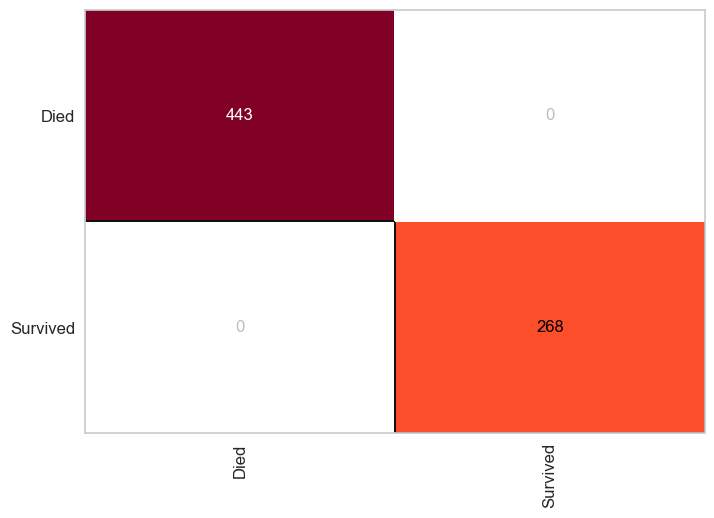

In [19]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model1,classes=["Died","Survived"])
cm.fit(x_train,y_train)
cm.score(x_train,y_train)

In [20]:
## Checking the test accuracy 
y_pred_test = model1.predict(x_test)
print("The Accuracy of the model is",accuracy_score(y_test,y_pred_test))
print("The Precision of the model is",precision_score(y_test,y_pred_test))
print("The Recall of the model is",recall_score(y_test,y_pred_test))
print("The F1 Score of the model is",f1_score(y_test,y_pred_test))
print("\n")
print(classification_report(y_test,y_pred_test))

The Accuracy of the model is 0.5955056179775281
The Precision of the model is 0.5116279069767442
The Recall of the model is 0.3013698630136986
The F1 Score of the model is 0.3793103448275862


              precision    recall  f1-score   support

           0       0.62      0.80      0.70       105
           1       0.51      0.30      0.38        73

    accuracy                           0.60       178
   macro avg       0.57      0.55      0.54       178
weighted avg       0.58      0.60      0.57       178



0.5955056179775281

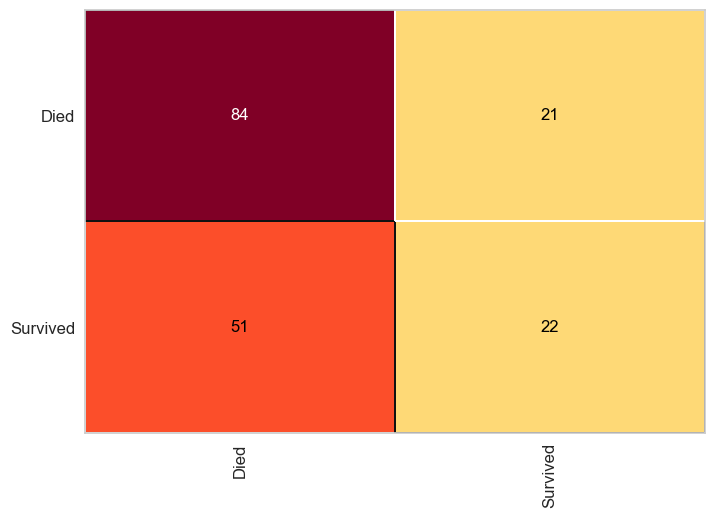

In [21]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm1 = ConfusionMatrix(model1,classes=["Died","Survived"])
cm1.fit(x_test,y_test)
cm1.score(x_test,y_test)

#### Here the F1 Score of the model is very low because the dataset in which the model is trained is imbalanced 

In [22]:
# Implementing Oversampling for Handling Imbalanced import SMOTE
from imblearn.over_sampling import SMOTE
smk = SMOTE(random_state=42)
x_res,y_res=smk.fit_resample(x,y)
print(x.shape,y.shape)
print(x_res.shape,y_res.shape)

(889, 8) (889,)
(1096, 8) (1096,)


In [23]:
## Preparing train and test data
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,shuffle=True,random_state =42)
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [24]:
## Checking training accuracy 
y_pred_train = model.predict(x_train)
print("The Accuracy of the model is",accuracy_score(y_train,y_pred_train))
print("The Precision of the model is",precision_score(y_train,y_pred_train))
print("The Recall of the model is",recall_score(y_train,y_pred_train))
print("The F1 Score of the model is",f1_score(y_train,y_pred_train))
print("\n")
print(classification_report(y_train,y_pred_train))

The Accuracy of the model is 1.0
The Precision of the model is 1.0
The Recall of the model is 1.0
The F1 Score of the model is 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       441
           1       1.00      1.00      1.00       435

    accuracy                           1.00       876
   macro avg       1.00      1.00      1.00       876
weighted avg       1.00      1.00      1.00       876



1.0

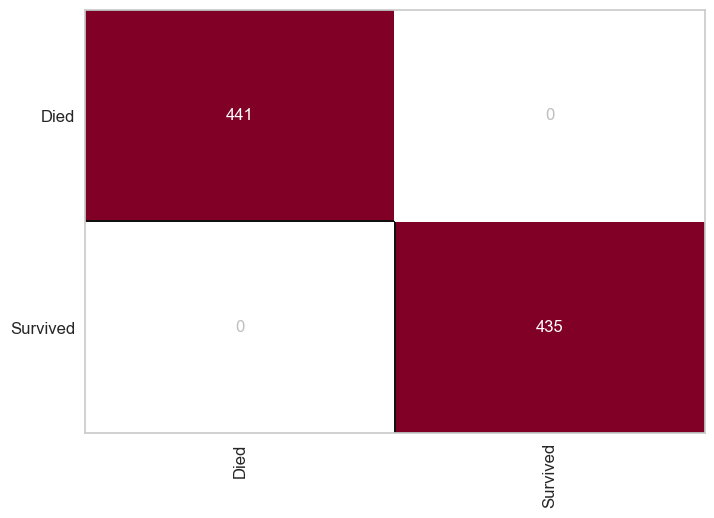

In [25]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model,classes=["Died","Survived"])
cm.fit(x_train,y_train)
cm.score(x_train,y_train)

In [26]:
## Checking the test accuracy 
y_pred_test = model.predict(x_test)
print("The Accuracy of the model is",accuracy_score(y_test,y_pred_test))
print("The Precision of the model is",precision_score(y_test,y_pred_test))
print("The Recall of the model is",recall_score(y_test,y_pred_test))
print("The F1 Score of the model is",f1_score(y_test,y_pred_test))
print("\n")
print(classification_report(y_test,y_pred_test))

The Accuracy of the model is 0.7090909090909091
The Precision of the model is 0.7425742574257426
The Recall of the model is 0.6637168141592921
The F1 Score of the model is 0.7009345794392523


              precision    recall  f1-score   support

           0       0.68      0.76      0.72       107
           1       0.74      0.66      0.70       113

    accuracy                           0.71       220
   macro avg       0.71      0.71      0.71       220
weighted avg       0.71      0.71      0.71       220



0.7090909090909091

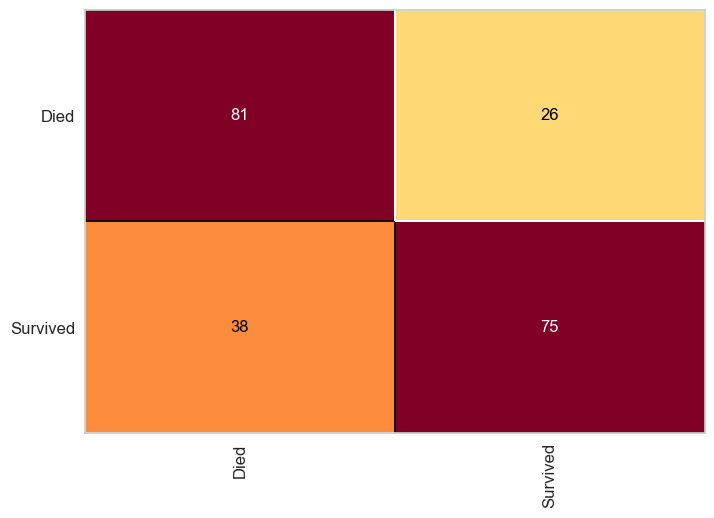

In [27]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm1 = ConfusionMatrix(model,classes=["Died","Survived"])
cm1.fit(x_test,y_test)
cm1.score(x_test,y_test)